In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Parameters Vector

Load and normalization vector of parameters.

In [37]:
# Loading csv file with parameters
allpatients = pd.read_csv('Dataset/male_a_2.csv')
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Status
0,-160.911944,228.681119,-73.592480,12.114209,-19.627556,-51.947163,35.624172,9.882168,-14.178359,20.714731,0.191217,0.059903,724.662174,0.889806,-0.896195,1.154653,-0.278985,Zdrowy
1,-197.106440,166.755201,-21.951723,-15.887035,-36.842218,-6.582878,5.057842,14.272520,-14.489270,-5.620738,0.148332,0.053717,417.236554,0.699998,-0.896794,2.979608,0.072243,Zdrowy
2,-204.650770,207.557119,-11.597554,11.815905,-40.266416,-32.428574,39.822402,8.095504,-11.392767,16.523839,0.194731,0.050808,618.072098,0.672834,-0.710505,0.712838,-0.001326,Zdrowy
3,-203.511075,188.906737,-27.676906,25.107307,-40.541275,-16.785163,37.529062,-1.826874,-9.332747,3.472364,0.102334,0.039368,116.005879,0.302423,-0.411391,0.969498,0.309411,Zdrowy
4,-158.058978,163.176761,-29.306014,9.665243,-42.922741,-17.166039,29.415382,11.528499,-15.655205,4.165401,0.129711,0.047785,432.854551,0.423341,-0.586455,1.982088,-0.035419,Zdrowy


Features has diffrent rows, so they have to be normalized.

In [38]:
features = allpatients.drop(labels='Status',axis=1).columns
for i in features:
    allpatients[i] = (allpatients[i] - np.mean(allpatients[i]))/np.std(allpatients[i])
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Status
0,0.728900,2.139424,-2.448289,1.352355,0.660232,-2.267691,2.229700,0.151138,-0.609042,2.078223,0.341019,0.632798,1.221243,2.262988,-1.428772,0.756403,-0.489581,Zdrowy
1,-0.088374,0.112522,-0.474817,-0.282986,-0.382543,0.353846,0.019758,0.493797,-0.632543,-0.138414,-0.445175,0.300716,-0.063878,1.098564,-1.431864,2.558879,0.358007,Zdrowy
2,-0.258726,1.448013,-0.079129,1.334933,-0.589964,-1.139740,2.533232,0.011692,-0.398486,1.725479,0.405441,0.144555,0.775668,0.931921,-0.471140,0.320030,0.180469,Zdrowy
3,-0.232992,0.837566,-0.693607,2.111184,-0.606613,-0.235729,2.367423,-0.762732,-0.242774,0.626946,-1.288456,-0.469644,-1.323103,-1.340451,1.071438,0.573528,0.930342,Zdrowy
4,0.793320,-0.004604,-0.755864,1.209329,-0.750870,-0.257739,1.780805,0.279631,-0.720673,0.685278,-0.786557,-0.017774,0.001409,-0.598652,0.168603,1.573646,0.098196,Zdrowy


# PCA

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=3)
pca.fit(allpatients.drop(['Status'], axis=1))
X = pca.transform(allpatients.drop(['Status'], axis=1))
X = pd.DataFrame(X, columns=['A','B','C'])
X['Status'] = allpatients['Status']

In [7]:
from mpl_toolkits.mplot3d import Axes3D

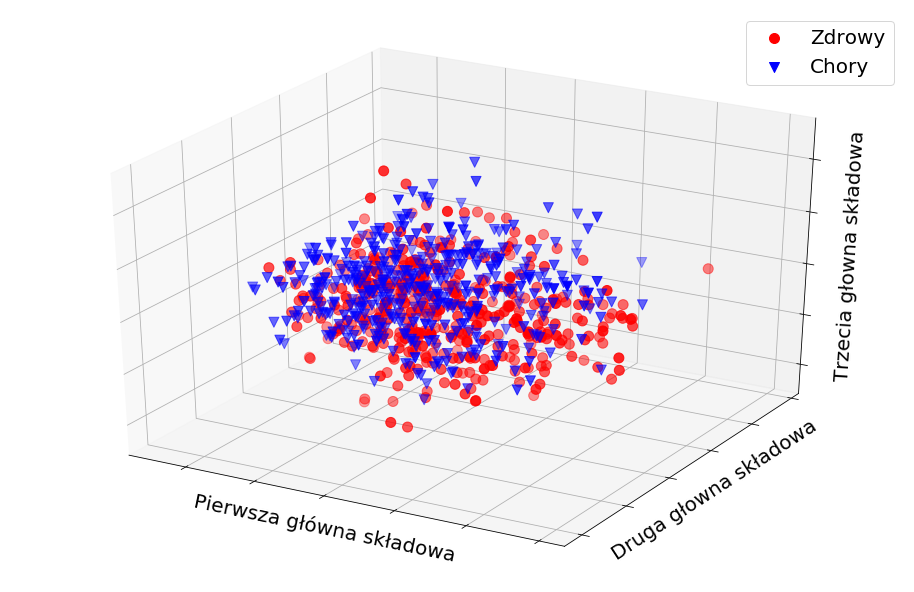

In [8]:
fig = plt.figure()
fig.set_size_inches(16, 10.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[X['Status']=='Zdrowy']['A'],
           X[X['Status']=='Zdrowy']['B'],
           X[X['Status']=='Zdrowy']['C'],
           s=100,
           c='r',
           marker='o',
           label='Zdrowy')
ax.scatter(X[X['Status']=='Chory']['A'],
           X[X['Status']=='Chory']['B'],
           X[X['Status']=='Chory']['C'],
           s=100,
           c='b',
           marker='v',
           label='Chory')
plt.legend(loc='upper right', frameon = True, fontsize=20)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Pierwsza główna składowa', fontsize=20)
ax.set_ylabel('Druga głowna składowa', fontsize=20)
ax.set_zlabel('Trzecia głowna składowa', fontsize=20)
plt.show()

# Dummy variables
We'll need to convert categorical features (Status) to dummy variables, because our alghoritm can't understant what means 'healthy'.

In [39]:
status = pd.get_dummies(allpatients['Status'],drop_first=True)

In [40]:
allpatients.drop(['Status'],axis=1,inplace=True)

In [41]:
allpatients['Chory'] = status
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Chory
0,0.728900,2.139424,-2.448289,1.352355,0.660232,-2.267691,2.229700,0.151138,-0.609042,2.078223,0.341019,0.632798,1.221243,2.262988,-1.428772,0.756403,-0.489581,1
1,-0.088374,0.112522,-0.474817,-0.282986,-0.382543,0.353846,0.019758,0.493797,-0.632543,-0.138414,-0.445175,0.300716,-0.063878,1.098564,-1.431864,2.558879,0.358007,1
2,-0.258726,1.448013,-0.079129,1.334933,-0.589964,-1.139740,2.533232,0.011692,-0.398486,1.725479,0.405441,0.144555,0.775668,0.931921,-0.471140,0.320030,0.180469,1
3,-0.232992,0.837566,-0.693607,2.111184,-0.606613,-0.235729,2.367423,-0.762732,-0.242774,0.626946,-1.288456,-0.469644,-1.323103,-1.340451,1.071438,0.573528,0.930342,1
4,0.793320,-0.004604,-0.755864,1.209329,-0.750870,-0.257739,1.780805,0.279631,-0.720673,0.685278,-0.786557,-0.017774,0.001409,-0.598652,0.168603,1.573646,0.098196,1


# Train test split
Dataset is splitted into train set 75% and test set 25%.

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(allpatients.drop(['Chory'], axis=1), 
                                                    allpatients['Chory'], 
                                                    test_size=0.25, 
                                                    random_state=42)

### K-fold validation
In order to find best hiper-parameters k-fold validation is used, due to low number of train examples

In [44]:
num_folds = 5

X_train_folds = []
y_train_folds = []

X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

# Logistic Regression Algorithm

In [45]:
from sklearn.linear_model import LogisticRegression

In [56]:
accuracies = {}
C = [1e-2, 4e-2, 8e-2, 1e-1, 2e-1, 4e-1, 6e-1, 8e-1, 1, 1.5, 2]

for c in C:
    for i in range(num_folds):
        logModel = LogisticRegression(penalty='l1', C=c, solver='liblinear')
        
        train_set = np.concatenate(X_train_folds[:i]+X_train_folds[i+1:])
        labels_set = np.concatenate(y_train_folds[:i]+y_train_folds[i+1:])
        
        logModel.fit(train_set, labels_set) 
        
        y_val_pred = logModel.predict(X_train_folds[i])
        val_acc = np.mean(y_val_pred == y_train_folds[i])
        
        if c in accuracies:
            accuracies[c].extend([val_acc])
        else:
            accuracies[c] = [val_acc]

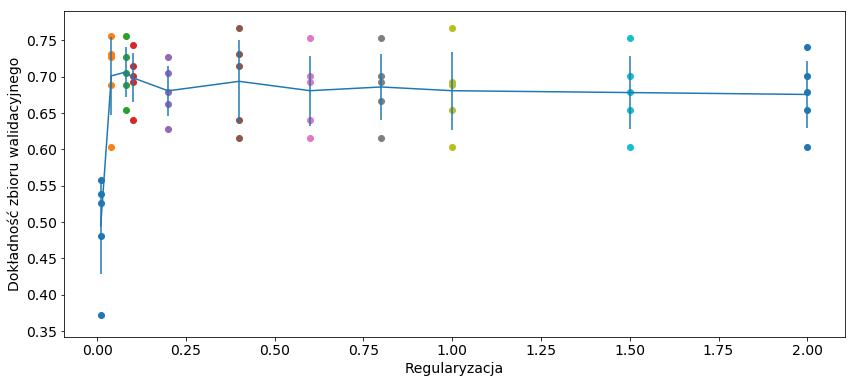

In [57]:
# plot the raw observations

for c in C:
    acc = accuracies[c]
    plt.scatter([c] * len(acc), acc)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(accuracies.items())])
plt.errorbar(C, accuracies_mean, yerr=accuracies_std)
plt.xlabel('Regularyzacja', fontsize=14)
plt.ylabel('Dokładność zbioru walidacyjnego', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [58]:
# Based on the cross-validation results above  I picked optimal C.
# I retrain the classifier using all the training data, and test it on the test
# data.
c = 0.08
log_model = LogisticRegression(penalty='l1', C=c, solver='liblinear')
log_model.fit(X_train, y_train)
prediction = log_model.predict(X_test)

# Evaluation
Check precission, recall, f1-score using classification report

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68        67
           1       0.66      0.73      0.69        63

   micro avg       0.68      0.68      0.68       130
   macro avg       0.69      0.69      0.68       130
weighted avg       0.69      0.68      0.68       130



In [61]:
print(confusion_matrix(y_test,prediction))

[[43 24]
 [17 46]]


# Random Forest Algorithm

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
accuracies = {}
n_estimators = [10, 50, 100, 120, 140, 160, 180, 200, 250, 300]

for n in n_estimators:
    for i in range(num_folds):
        rf_model = RandomForestClassifier(n_estimators=n)
        
        train_set = np.concatenate(X_train_folds[:i]+X_train_folds[i+1:])
        labels_set = np.concatenate(y_train_folds[:i]+y_train_folds[i+1:])
        
        rf_model.fit(train_set, labels_set) 
        
        y_val_pred = rf_model.predict(X_train_folds[i])
        val_acc = np.mean(y_val_pred == y_train_folds[i])
        
        if n in accuracies:
            accuracies[n].extend([val_acc])
        else:
            accuracies[n] = [val_acc]

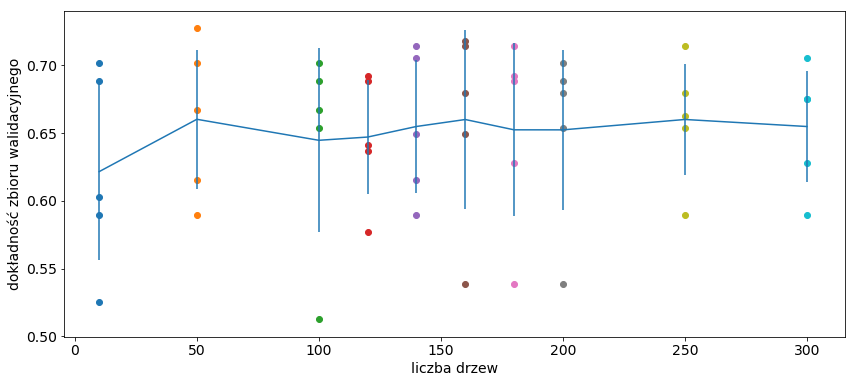

In [66]:
# plot the raw observations

for n in n_estimators:
    acc = accuracies[n]
    plt.scatter([n] * len(acc), acc)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(accuracies.items())])
plt.errorbar(n_estimators, accuracies_mean, yerr=accuracies_std)
plt.xlabel('liczba drzew', fontsize=14)
plt.ylabel('dokładność zbioru walidacyjnego', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [67]:
# Based on the cross-validation results above  I picked optimal number of estimators.
# I retrain the classifier using all the training data, and test it on the test
# data.
best_n = 250
rf_model = RandomForestClassifier(n_estimators=best_n)
rf_model.fit(X_train, y_train)
prediction = rf_model.predict(X_test)

# Evaluation
Check precission, recall, f1-score using classification report

In [68]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.73      0.64      0.68        67
           1       0.66      0.75      0.70        63

   micro avg       0.69      0.69      0.69       130
   macro avg       0.70      0.69      0.69       130
weighted avg       0.70      0.69      0.69       130



In [32]:
print(confusion_matrix(y_test,prediction))

[[82 27]
 [30 75]]


In [35]:
feature_importance = rf_model.feature_importances_

[Text(0,0,'MFCC1'),
 Text(0,0,'MFCC2'),
 Text(0,0,'MFCC3'),
 Text(0,0,'MCCC4'),
 Text(0,0,'MFCC5'),
 Text(0,0,'MFCC6'),
 Text(0,0,'MFCC7'),
 Text(0,0,'MFCC8'),
 Text(0,0,'MFCC9'),
 Text(0,0,'MFCC10'),
 Text(0,0,'RMS'),
 Text(0,0,'ZCR'),
 Text(0,0,'F0'),
 Text(0,0,'Maks'),
 Text(0,0,'Min'),
 Text(0,0,'Kurt'),
 Text(0,0,'Skos')]

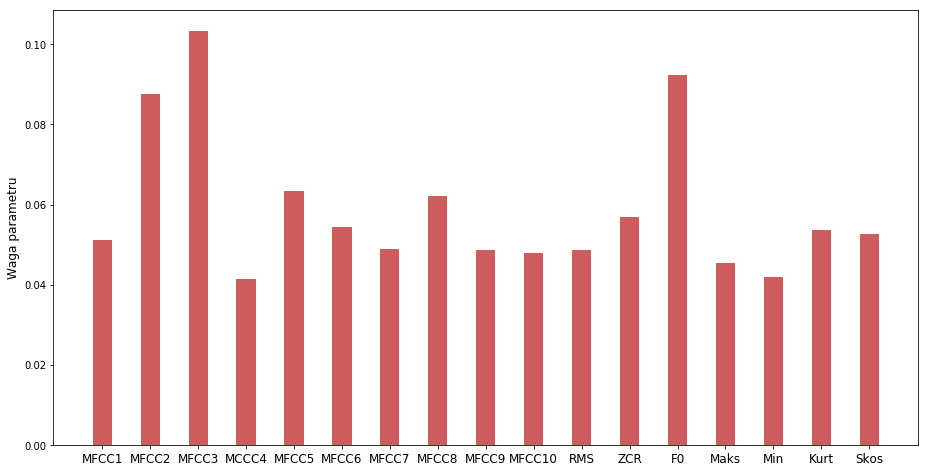

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(15.5, 8)
plt.grid(b=False)
ind = np.arange(len(feature_importance))  # the x locations for the groups
width = 0.4  # the width of the bars
ax.bar(ind, feature_importance, width, color='IndianRed')
ax.set_ylabel('Waga parametru', fontsize=12)
ax.set_xticks(ind)
ax.set_xticklabels(['MFCC1', 'MFCC2', 'MFCC3', 'MCCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8',
       'MFCC9', 'MFCC10', 'RMS', 'ZCR', 'F0', 'Maks', 'Min', 'Kurt',
       'Skos'], fontsize=12)